<a href="https://colab.research.google.com/github/R0N3ldrt/Thesis/blob/main/synthetic_constellation_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Synthetic Constellation

# Loading Necesary Libraries

In [2]:
# Importing necesary libraries
# Libraries for correct code execution 

import os, time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import pickle
import random
import csv
import re
from tqdm import tqdm

from random import random, gauss
from math import modf, pi, cos, sin, sqrt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from plotly.subplots import make_subplots

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

from keras.models import Sequential
from keras.layers import Dense,Conv2D, Flatten
from keras.wrappers.scikit_learn import KerasRegressor
from keras.callbacks import EarlyStopping
from sklearn.mixture import GaussianMixture

import warnings
warnings.filterwarnings("ignore")

# Load Enviroment

In [3]:
# BLOQUE PARA USAR DESDE COLAB

# Google drive loading as work station for local-usage of the files.
from google.colab import drive
drive.mount('/content/gdrive',force_remount= True)

#-----------------------------------------------------------------------------

Mounted at /content/gdrive


In [4]:
# Lista para cambiar los paths rapido.
workers = ["Ronald", "Local"]

# Change the number to change the paths.
worker = workers[0]

if worker == "Ronald":
  path= "/content/gdrive/MyDrive/Thesis_Workstation/ANN_dataset"
else: path = os.getcwd()

# Synthetic Constellation

In [5]:
def synthetic_constellation(r_dispertion, n_samples=1, centroid = None, n_features = 2048, distribution_funct = 'uniform', power_val='-2'):
  samples_per_square = int(n_features/16)

  data = {}
  if centroid == None: # default centroids
    centroids = [(-3, 3), (-1, 3), (1, 3), (3, 3),
                (-3, 1), (-1, 1), (1, 1), (3, 1),
                (-3, -1), (-1, -1), (1, -1), (3, -1),
                (-3, -3), (-1, -3), (1, -3), (3, -3)]

  samples_per_square_cnt = 0

  centroid_cnt = 0
  
  for feature_num in range(0, n_features):
    sample_data = []

    for sample in range(n_samples):
      if r_dispertion == 0:
        # Process for dispersion 0
        if samples_per_square_cnt == samples_per_square-1 and samples_per_square != n_features:
          centroid_cnt += 1
          samples_per_square = samples_per_square + 128
          r = centroids[centroid_cnt][0] #real
          i = centroids[centroid_cnt][1] #imag

          symbol = complex(r, i)

        else: # First iteration (square 1)
          r = centroids[centroid_cnt][0]
          i = centroids[centroid_cnt][1]

          symbol = complex(r, i)

      else: # Process for dispersion > 0
        if samples_per_square_cnt == samples_per_square-1 and samples_per_square != n_features:
          centroid_cnt += 1
          samples_per_square = samples_per_square + 128
          if distribution_funct == 'uniform':
            r_x, r_y = uniform_point(r=r_dispertion, xc=centroids[centroid_cnt][0], yc=centroids[centroid_cnt][1])
          elif distribution_funct == 'non_uniform':
            r_x, r_y = non_uniform_point(r=r_dispertion, xc=centroids[centroid_cnt][0], yc=centroids[centroid_cnt][1])
          elif distribution_funct == 'gaussian':
            r_x, r_y = gausian_point(r=r_dispertion, xc=centroids[centroid_cnt][0], yc=centroids[centroid_cnt][1])
          
          symbol = complex(r_x, r_y)
        
        else: # First iteration (square 1)
          if distribution_funct == 'uniform':
            r_x, r_y = uniform_point(r=r_dispertion, xc=centroids[centroid_cnt][0], yc=centroids[centroid_cnt][1])
          elif distribution_funct == 'non_uniform':
            r_x, r_y = non_uniform_point(r=r_dispertion, xc=centroids[centroid_cnt][0], yc=centroids[centroid_cnt][1])
          elif distribution_funct == 'gaussian':
            r_x, r_y = gausian_point(r=r_dispertion, xc=centroids[centroid_cnt][0], yc=centroids[centroid_cnt][1])

          symbol = complex(r_x, r_y)

      sample_data.append(symbol) #Adding values for the new constellation points
    samples_per_square_cnt += 1    
    if feature_num == 0:
      data['sampleid'] = [(s_id+1) for s_id in range(n_samples)]
      power = []
      for s_id in range(n_samples): power.append(power_val)
      data['power_dBm'] = power
    data['o'+str(feature_num)] = sample_data

  df = pd.DataFrame(data)

  return df


In [6]:
def uniform_point(r=1, xc=0, yc=0):
  r = r*sqrt(random())
  theta = 2*pi*random()
  return xc+r*cos(theta), yc+r*sin(theta)

In [7]:
def non_uniform_point(r=1, xc=0, yc=0):
  r = r*random()
  theta = 2*pi*random()
  return xc+r*cos(theta), yc+r*sin(theta)

In [8]:
def gausian_point(r=1, xc=0, yc=0):
  r = r*sqrt(-2*math.log(random()))
  theta = 2*pi*random()
  return xc+r*cos(theta), yc+r*sin(theta)

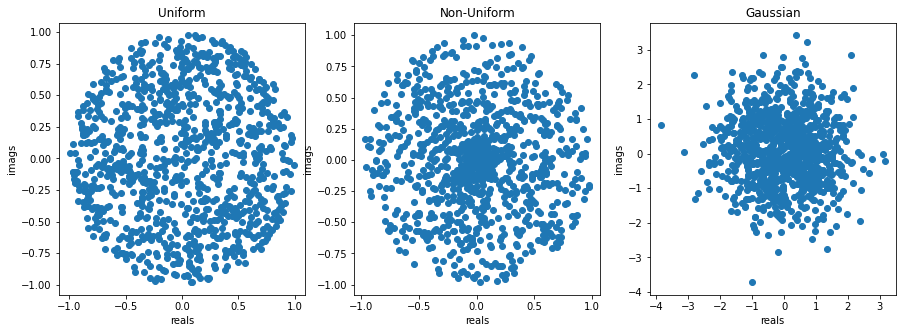

In [12]:
# Test distribution
x_uni = []
y_uni = []

x_non_uni = []
y_non_uni = []

x_gauss = []
y_gauss = []

for i in range(0, 1000):

  x_val, y_val = uniform_point(r=1, xc=0, yc=0)
  x_uni.append(x_val)
  y_uni.append(y_val)

  x_val, y_val = non_uniform_point(r=1, xc=0, yc=0)
  x_non_uni.append(x_val)
  y_non_uni.append(y_val)

  x_val, y_val = gausian_point(r=1, xc=0, yc=0)
  x_gauss.append(x_val)
  y_gauss.append(y_val)

plt.subplots(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(x_uni, y_uni)
plt.title('Uniform')
plt.xlabel('reals')
plt.ylabel('imags')

plt.subplot(1, 3, 2)
plt.scatter(x_non_uni, y_non_uni)
plt.title('Non-Uniform')
plt.xlabel('reals')
plt.ylabel('imags')

plt.subplot(1, 3, 3)
plt.scatter(x_gauss, y_gauss)
plt.title('Gaussian')
plt.xlabel('reals')
plt.ylabel('imags')


plt.show()

In [13]:
synthetic_df = synthetic_constellation(r_dispertion=0.01, n_samples=1, centroid = None, n_features = 2048, distribution_funct = 'uniform', power_val='-2')
display(synthetic_df)

,sampleid,power_dBm,o0,o1,o2,o3,o4,o5,o6,o7,...,o2038,o2039,o2040,o2041,o2042,o2043,o2044,o2045,o2046,o2047
0,1,-2,-2.996647+2.993196j,-2.999831+3.001793j,-3.004662+3.008048j,-3.000974+2.993013j,-3.006266+3.002426j,-3.006815+3.001494j,-2.997889+2.991556j,-3.003482+3.005392j,...,2.997548-2.994062j,3.008000-3.005136j,3.003989-2.999551j,3.003619-3.000570j,3.000276-3.000702j,2.997308-2.999501j,3.003358-2.999568j,3.004602-2.994568j,3.002202-2.990339j,3.005770-3.007481j


# Test Runs

In [ ]:
test_runs = {'uniform':[0, 0.01, 0.02, 0.03],
             'non_uniform':[0, 0.01, 0.02, 0.03],
             'gaussian':[0, 0.01, 0.02, 0.03]}

for funct, radius in test_runs.items():
  for r in radius:
    synthetic_df = synthetic_constellation(r_dispertion=r, n_samples=10, centroid = None, n_features = 2048, distribution_funct = funct, power_val='-2')

    filepath = path+'/synthetic_constellations/synthetic_cosntelation_radius_'+str(r)+'_funct_'+str(funct)+'.csv'
    
    synthetic_df.to_csv(filepath, index=False, encoding='utf-8-sig')   